In [1]:
import pandas as pd
import numpy as np

df_clean = pd.read_csv("D:/School/cours_5eme/projet/code/database/Kyoto2016/2015/concatenation_all/wrong_and_good.csv", sep = ",")

In [2]:
df_clean.loc[df_clean['malware_detection'] != 0] = 1

In [3]:
df_clean = df_clean.astype(int)

In [4]:
X = df_clean.drop(['malware_detection'], axis = 1)
y = df_clean[['malware_detection']]

In [5]:
X=X.values.reshape((X.values.shape[0], X.values.shape[1], 1))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
# Question 1
# instantiate the model, add hidden and output layers
model=Sequential()

model.add(LSTM(64, input_shape=(23,1), return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Question 2
# compile and summarize the model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


# train the model 
h = model.fit(X_train, y_train,validation_data = (X_test, y_test), epochs=5)

Epoch 1/5
18351/48777 [==========>...................] - ETA: 3:50 - loss: 0.0142 - accuracy: 0.9976

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

# Question 7
# plot train and test losses
plot_loss(h.history['loss'], h.history['val_loss'])

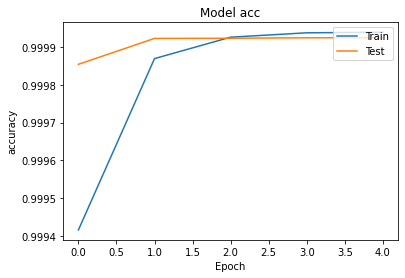

In [10]:
def plot_acc(acc,val_acc):
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model acc')
  plt.ylabel('accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

# Question 7
# plot train and test losses
plot_acc(h.history['accuracy'], h.history['val_accuracy'])